In [15]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)

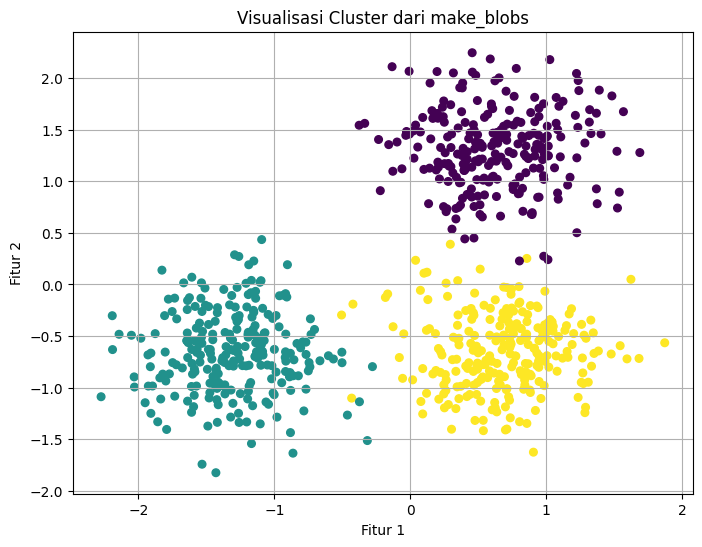

In [16]:
#Visualisasi hasil
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels_true, s=30, cmap="viridis")

plt.title("Visualisasi Cluster dari make_blobs")
plt.xlabel("Fitur 1")
plt.ylabel("Fitur 2")
plt.grid(True)
plt.show()


#Compute DBSCAN
Label yang ditetapkan oleh DBSCAN dapat diakses melalui atribut labels_. Titik data yang dianggap noise akan diberi label khusus.


In [19]:
import numpy as np
from sklearn import metrics
from sklearn.cluster import DBSCAN

# Buat model DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

# Hitung jumlah cluster (tidak termasuk noise = -1)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)


Estimated number of clusters: 3
Estimated number of noise points: 18


#Evaluasi Kualitas Klasterisasi
karena kita menggunakan dataset sintetis (make_blobs), kita tahu label aslinya (labels_true). Ini memungkinkan kita mengukur kualitas DBSCAN dengan berbagai metrik evaluasi.

In [21]:
from sklearn import metrics

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))


Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


#Visualisasi Hasil Klasterisasi
Kita akan memvisualisasikan hasil DBSCAN.

Core sample ditampilkan dengan titik besar.

Non-core sample ditampilkan dengan titik kecil.

Noise ditampilkan dengan warna hitam.

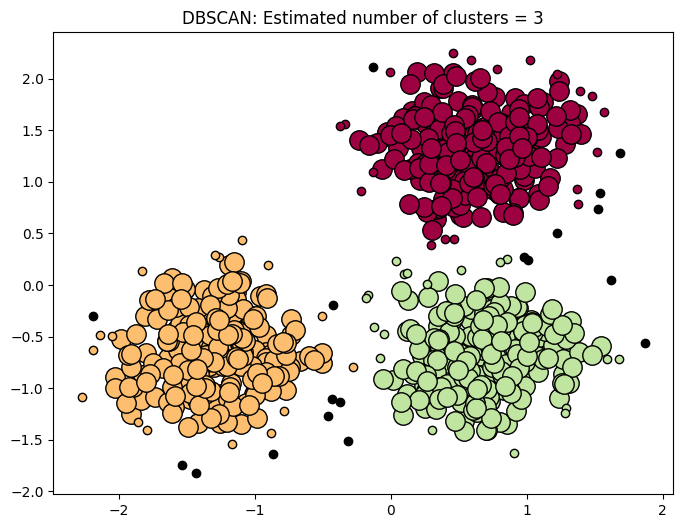

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Masking core sample
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Warna berbeda untuk tiap cluster
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(8, 6))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Noise diberi warna hitam
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    # Plot core sample besar
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0], xy[:, 1], "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    # Plot non-core sample kecil
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0], xy[:, 1], "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"DBSCAN: Estimated number of clusters = {n_clusters_}")
plt.show()
